In [1]:
import sys

#sys.path.insert(0, 'backend_functions')

#import selection_functions as sf

import importlib

import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb

import awkward
import matplotlib.pyplot as plt
import pandas as pd

import ROOT
from ROOT import TH1F, TH2F, TDirectory, TH1D

from matplotlib import gridspec


Welcome to JupyROOT 6.24/02


In [2]:
ending = "Jan19b_noTune"

In [3]:
##Regular tune prior true and smearcept to be used


#prior true
#"nue_full_500_catsel_nopions_angleDiff_usingSelection_prior_true_signal_blockwise_recoCut_comb_"+ending+".csv"

In [4]:
####Load in noTune full event counts

nue_data_signal = pd.read_csv("nue_full_500_catsel_nopions_angleDiff_usingSelection_full_evt_count_MCONLY_recoCut_comb_"+ending+".csv", header=None)

nue_data_signal = nue_data_signal.values[:, 0]

print(nue_data_signal)
print("")

######

numu_data_signal = pd.read_csv("numu_full_500_catsel_nopions_angleDiff_usingSelection_full_evt_count_MCONLY_recoCut_comb_"+ending+".csv", header=None)

numu_data_signal = numu_data_signal.values[:, 0]

print(numu_data_signal)

[ 2.00428092  2.89820698  3.60046196  7.12586273  8.22560068  9.87991242
 11.91738746 19.84497958 36.48767491 98.29519951]

[ 48.93709149  39.60898693  50.53791733  59.32608098  72.87827786
 112.08256206 152.772705   237.76146514 428.43135875 770.00751502]


In [5]:
###Load in regular tune bkg event counts
#Include ext in bkg count here as the full event counts do

ending = "Jan19b" #need this ending as bkg is from regular tune



nue_bkg_inc_ext = pd.read_csv("nue_nopions_angleDiff_usingSelection_comb_cv_nue_bkg_incExt_"+ending+".csv", header=None)

nue_bkg_inc_ext = nue_bkg_inc_ext.values[:, 0]

print(nue_bkg_inc_ext)
print("")

#######################

numu_bkg_inc_ext = pd.read_csv("numu_nopions_angleDiff_usingSelection_comb_cv_numu_bkg_incExt_"+ending+".csv", header=None)

numu_bkg_inc_ext = numu_bkg_inc_ext.values[:, 0]

print(numu_bkg_inc_ext)
print("")

[ 1.12526165  1.34119398  1.9677378   4.85417832  3.56980533  4.03877779
  3.87288048  6.20261081 13.48506183 41.19945679]

[ 21.12417618  13.66555818  12.75149841  13.44984114  18.55950364
  36.54433324  54.24502032  88.85075733 175.76762929 359.07344107]



In [6]:
####So then can calculate the data signal input to the unfolding

nue_datasig_bkg_subtracted = nue_data_signal - nue_bkg_inc_ext
print(nue_datasig_bkg_subtracted)
print("")

numu_datasig_bkg_subtracted = numu_data_signal - numu_bkg_inc_ext
print(numu_datasig_bkg_subtracted)

[ 0.87901928  1.557013    1.63272416  2.27168442  4.65579534  5.84113462
  8.04450698 13.64236878 23.00261307 57.09574272]

[ 27.81291531  25.94342875  37.78641892  45.87623984  54.31877422
  75.53822882  98.52768468 148.91070782 252.66372947 410.93407396]


In [7]:
nue_numu_tot = np.concatenate((nue_datasig_bkg_subtracted, numu_datasig_bkg_subtracted), axis=0)

print(nue_numu_tot)
print(len(nue_numu_tot))

[  0.87901928   1.557013     1.63272416   2.27168442   4.65579534
   5.84113462   8.04450698  13.64236878  23.00261307  57.09574272
  27.81291531  25.94342875  37.78641892  45.87623984  54.31877422
  75.53822882  98.52768468 148.91070782 252.66372947 410.93407396]
20


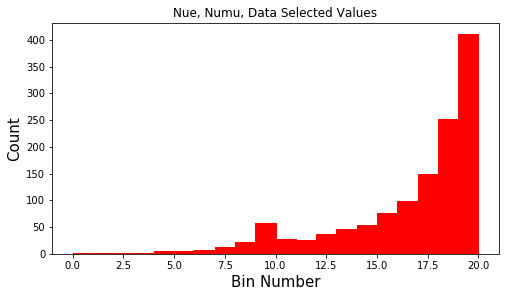

In [8]:
nue_numu_fig = plt.figure(figsize=(8, 7))
nue_numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_numu_ax1 = plt.subplot(nue_numu_gs[0])


#bins = np.arange(0, 10.5, 0.5)
#count = np.linspace(0.1, 9.6, 20)
bins = np.arange(0, 21, 1)
count = np.arange(0.0, 20.0, 1)


sel_ratio = nue_numu_ax1.hist(count, bins, edgecolor='red', facecolor='red', weights=nue_numu_tot)
nue_numu_ax1.set_ylabel('Count', fontsize=15)
nue_numu_ax1.set_xlabel('Bin Number', fontsize=15)
nue_numu_ax1.set_title("Nue, Numu, Data Selected Values")
#leg = nue_numu_ax1.legend()
#nue_numu_ax1.set_ylim([0, 1])

nue_numu_fig.savefig("data_signal_MC_noTune_input_angleDiff_comb_"+ending+".svg", bbox_inches='tight')

In [9]:
np.savetxt("data_signal_MC_noTune_input_angleDiff_comb_"+ending+".csv", 
               nue_numu_tot,
               delimiter =", ", 
               fmt ='% s')

print(ending)

Jan19b


In [10]:
####Now need to get in the uncertainties

###First up, get the noTune statistical uncertinaty. This will be from sig + bkg in noTune

ending = "Jan19b_noTune" 


nue_sig_unc = pd.read_csv("nue_total_noTune_err_squared_angle_comb_"+ending+".csv", header=None)

nue_sig_unc = nue_sig_unc.values[:, 0]

print(nue_sig_unc)
print("")

########################

numu_sig_unc = pd.read_csv("numu_total_noTune_err_squared_angle_comb_"+ending+".csv", header=None)

numu_sig_unc = numu_sig_unc.values[:, 0]

print(numu_sig_unc)
print("")

[0.41790994 0.31689052 1.11285847 1.79450975 1.1992615  1.58765122
 0.98903841 1.27248692 1.82450469 6.01731001]

[ 10.44471462   8.37803187  12.7386815   12.98611924  16.72426127
  31.36688418  41.23159379  60.18106967  95.8842352  165.73679854]



In [11]:
####The regular tune bkg stat uncertainties

ending = "Jan19b" #need this ending as bkg is from regular tune


nue_bkg_unc = pd.read_csv("nue_bkg_exp_err_squared_angle_comb_"+ending+".csv", header=None)

nue_bkg_unc = nue_bkg_unc.values[:, 0]

print(nue_bkg_unc)
print("")

########################

numu_bkg_unc = pd.read_csv("numu_bkg_exp_err_squared_angle_comb_"+ending+".csv", header=None)

numu_bkg_unc = numu_bkg_unc.values[:, 0]

print(numu_bkg_unc)
print("")

[0.40397591 0.37808445 1.0941558  1.8814619  1.1171987  1.52658216
 0.90694911 1.11480065 2.80841077 5.50815593]

[ 5.45466702  3.33918978  4.99445026  3.95957698  6.36767205 16.47824989
 23.04967856 32.79183015 56.30092691 96.5522802 ]



In [12]:
nue_stat_unc = nue_sig_unc + nue_bkg_unc
print(nue_stat_unc)
print("")

########################

numu_stat_unc = numu_sig_unc + numu_bkg_unc
print(numu_stat_unc)
print("")

#########################

nue_numu_tot_unc = np.concatenate((nue_stat_unc, numu_stat_unc), axis=0)

print(nue_numu_tot_unc)

[ 0.82188585  0.69497497  2.20701428  3.67597166  2.3164602   3.11423338
  1.89598752  2.38728757  4.63291547 11.52546594]

[ 15.89938163  11.71722165  17.73313175  16.94569622  23.09193332
  47.84513406  64.28127235  92.97289983 152.18516211 262.28907874]

[  0.82188585   0.69497497   2.20701428   3.67597166   2.3164602
   3.11423338   1.89598752   2.38728757   4.63291547  11.52546594
  15.89938163  11.71722165  17.73313175  16.94569622  23.09193332
  47.84513406  64.28127235  92.97289983 152.18516211 262.28907874]


In [13]:
nue_numu_cov_stats   = np.zeros([(len(bins)-1), (len(bins)-1)])
print(nue_numu_cov_stats)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [14]:
nue_numu_cov_stats[np.diag_indices_from(nue_numu_cov_stats)]    = nue_numu_tot_unc

In [15]:
###Then sprinkle in the regular tune genie sys uncertainties

# Load in the blockwise genie cov matrix

blockwise_genie_err = pd.read_csv("blockwise_cov_genie_only_angle_comb_"+ending+".csv", header=None)

blockwise_genie_err = blockwise_genie_err.values
print(blockwise_genie_err)

[[ 9.18443116e-02  1.13662907e-01  8.33358093e-02  2.10837354e-01
   2.07396226e-01  2.59818023e-01  3.27722256e-01  6.27585065e-01
   1.28768475e+00  3.50560204e+00  1.38008040e+00  9.40463478e-01
   1.25984605e+00  1.62055443e+00  1.54775410e+00  3.03943943e+00
   4.21961010e+00  6.83774612e+00  1.34303165e+01  2.65512195e+01]
 [ 1.13662907e-01  2.33863420e-01  1.39791193e-01  3.34271316e-01
   3.24597457e-01  4.54591883e-01  5.47101848e-01  9.87749872e-01
   1.88414592e+00  4.29363595e+00  2.31316165e+00  1.75279186e+00
   2.28451225e+00  2.85667393e+00  2.89229148e+00  4.68332834e+00
   6.23796707e+00  9.60210418e+00  1.81233648e+01  3.08530459e+01]
 [ 8.33358093e-02  1.39791193e-01  1.66734039e-01  2.88419853e-01
   2.64217900e-01  3.76454316e-01  5.23566839e-01  9.52845690e-01
   1.99534694e+00  5.73646958e+00  1.79901108e+00  1.33805924e+00
   2.00791801e+00  2.65311693e+00  2.53738796e+00  4.89447117e+00
   6.48096814e+00  1.04324050e+01  2.12042649e+01  4.37035809e+01]
 [ 2.10

In [16]:
# Load in the blockwise nuwrounisim cov matrix

nuWro_unisim = pd.read_csv("nuWro_extra_unisim_uncertainties_angle_comb_"+ending+".csv", header=None)

nuWro_unisim = nuWro_unisim.values
print(nuWro_unisim)

[[ 2.66764082e+00 -1.92007286e+00 -4.11136801e-01  1.28835472e+00
  -2.80741383e+00 -4.49351472e+00  1.99695134e+00 -5.47084551e+00
   1.89244860e-01  2.64680810e+01  3.52803426e+00 -3.00908718e+01
  -4.16891534e+01 -1.69118695e+00 -7.39455414e+00 -4.97564616e+01
  -5.97663340e+00 -5.92124514e+01  8.98624927e+00  8.14334332e+01]
 [-1.92007286e+00  1.38200007e+00  2.95921628e-01 -9.27311847e-01
   2.02067650e+00  3.23427186e+00 -1.43733446e+00  3.93771977e+00
  -1.36211711e-01 -1.90507821e+01 -2.53935341e+00  2.16583379e+01
   3.00063679e+01  1.21725614e+00  5.32233672e+00  3.58129291e+01
   4.30176787e+00  4.26190138e+01 -6.46798220e+00 -5.86128851e+01]
 [-4.11136801e-01  2.95921628e-01  6.33644034e-02 -1.98561229e-01
   4.32678617e-01  6.92540484e-01 -3.07770139e-01  8.43166705e-01
  -2.91664176e-02 -4.07926061e+00 -5.43740636e-01  4.63760513e+00
   6.42513228e+00  2.60645731e-01  1.13964868e+00  7.66846581e+00
   9.21118734e-01  9.12582296e+00 -1.38496073e+00 -1.25505207e+01]
 [ 1.28

In [17]:
##### Now make the total cov matrix

total_noTune_input_cov = nue_numu_cov_stats + blockwise_genie_err + nuWro_unisim

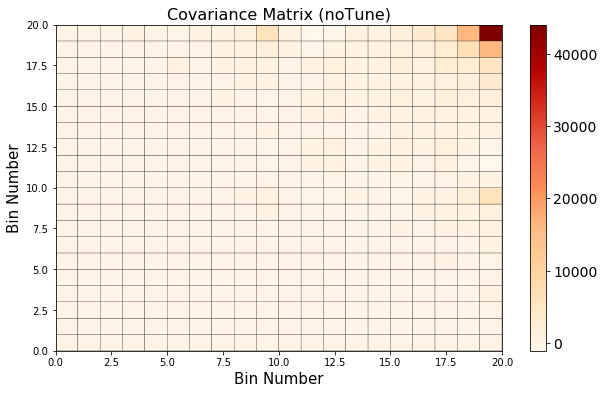

In [18]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_noTune_input_cov, cmap='OrRd', edgecolors='k')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#if pot: 
#    cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)

plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])


plt.xlabel("Bin Number", fontsize=15)
plt.ylabel("Bin Number", fontsize=15)

plt.title('Covariance Matrix (noTune)', fontsize=16)


plt.savefig("data_covmat_MC_noTune_input_angleDiff_comb_"+ending+".svg", bbox_inches='tight')

plt.show()

In [19]:
np.savetxt("data_covmat_MC_noTune_input_angleDiff_comb_"+ending+".csv", 
           total_noTune_input_cov,
           delimiter =", ", 
           fmt ='% s')

In [20]:
ending

'Jan19b'